In [216]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [217]:
# reading the exams dataset
df = pd.read_csv('exams.csv')

## Section 1. Cleaning / Pre-processing data

In [218]:
df = df.dropna() # drops NaN values 
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [219]:
# Adding total_score column which combines the math,reading,and writing score
df['total_score'] = sum([df['math score'],df['reading score'],df['writing score']])

In [220]:
# To keep blank copy of the data
df1 = df.copy() 

In [221]:
# dropping the math, reading, and writing score columns since we have created a new total_score column
columns_to_drop = ['math score', 'reading score','writing score']
df.drop(columns_to_drop, axis=1, inplace=True)

In [222]:
# printing the columns
print(df.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'total_score']


## Section 2. Data Exploration

In [223]:
def bar_plot(variable):
    
    var = df[variable]
    
    varValue = var.value_counts()
    

    plt.figure(figsize =(5,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
        # Ensure the plot fits within the figure boundaries
    plt.tight_layout()
    

    plt.show()
    print("{}: \n {}".format(variable,varValue))

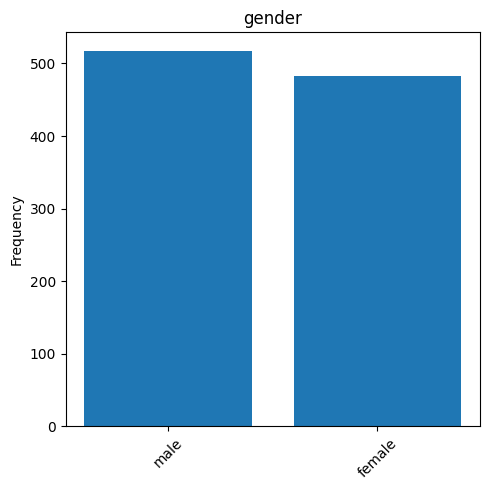

gender: 
 gender
male      517
female    483
Name: count, dtype: int64


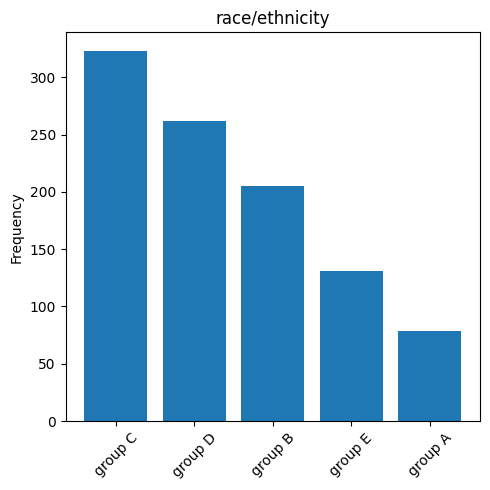

race/ethnicity: 
 race/ethnicity
group C    323
group D    262
group B    205
group E    131
group A     79
Name: count, dtype: int64


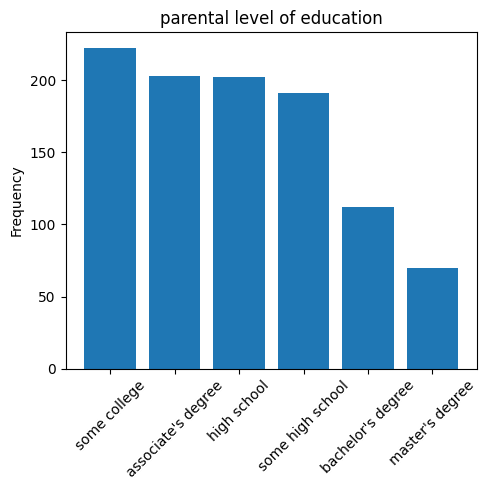

parental level of education: 
 parental level of education
some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: count, dtype: int64


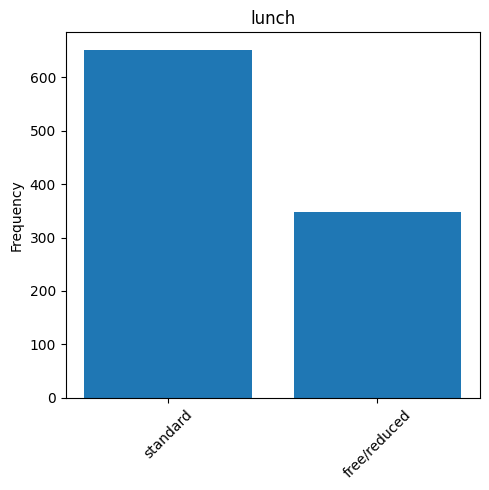

lunch: 
 lunch
standard        652
free/reduced    348
Name: count, dtype: int64


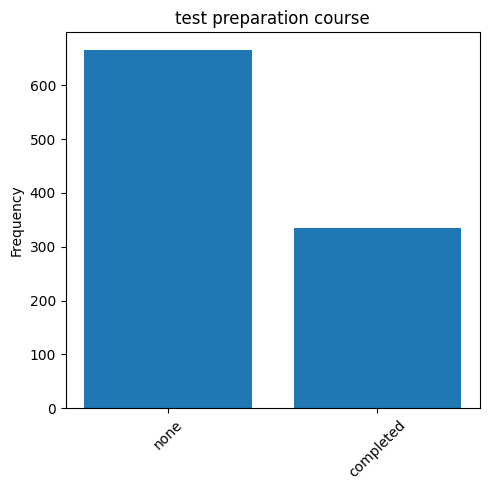

test preparation course: 
 test preparation course
none         665
completed    335
Name: count, dtype: int64


In [224]:
category1 = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]

for c in category1:
    
    bar_plot(c)

## Section 3. EDA Algorithm

In [225]:
# describes the total score
print(df.describe())

       total_score
count  1000.000000
mean    203.136000
std      43.542732
min      65.000000
25%     175.750000
50%     202.000000
75%     235.000000
max     300.000000


In [226]:
# Displaying the frequency table of “race/ethnicity” vs. lunch
frequency_table = df.groupby(['race/ethnicity','lunch']).size().reset_index(name='Frequency')
print(frequency_table)

  race/ethnicity         lunch  Frequency
0        group A  free/reduced         26
1        group A      standard         53
2        group B  free/reduced         70
3        group B      standard        135
4        group C  free/reduced        115
5        group C      standard        208
6        group D  free/reduced         78
7        group D      standard        184
8        group E  free/reduced         59
9        group E      standard         72


In [227]:
# Displaying the frequency table of “race/ethnicity” vs. test preparation course
frequency_table = df.groupby(['race/ethnicity','test preparation course']).size().reset_index(name='Frequency')
print(frequency_table)

  race/ethnicity test preparation course  Frequency
0        group A               completed         32
1        group A                    none         47
2        group B               completed         72
3        group B                    none        133
4        group C               completed        102
5        group C                    none        221
6        group D               completed         84
7        group D                    none        178
8        group E               completed         45
9        group E                    none         86


In [228]:
# Displaying the frequency table of “race/ethnicity” vs. test preparation course
frequency_table = df.groupby(['race/ethnicity','parental level of education']).size().reset_index(name='Frequency')
print(frequency_table)

   race/ethnicity parental level of education  Frequency
0         group A          associate's degree         11
1         group A           bachelor's degree         14
2         group A                 high school         15
3         group A             master's degree          8
4         group A                some college         20
5         group A            some high school         11
6         group B          associate's degree         40
7         group B           bachelor's degree         20
8         group B                 high school         39
9         group B             master's degree         19
10        group B                some college         49
11        group B            some high school         38
12        group C          associate's degree         75
13        group C           bachelor's degree         35
14        group C                 high school         58
15        group C             master's degree         20
16        group C              

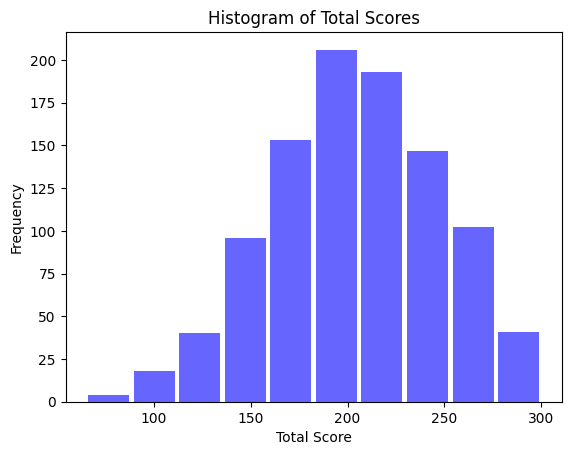

In [229]:
# Show histogram for total_score column
plt.hist(df['total_score'], bins=10, color='blue', alpha=0.6,rwidth=0.9)
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Histogram of Total Scores')
plt.show()


In [230]:
# creating new data frames depending on the race/ethnicity to use in our box plots
E_df = df.loc[df['race/ethnicity'] == 'group E']
D_df = df.loc[df['race/ethnicity'] == 'group D']
B_df = df.loc[df['race/ethnicity'] == 'group B']
C_df = df.loc[df['race/ethnicity'] == 'group C']
A_df = df.loc[df['race/ethnicity'] == 'group A']



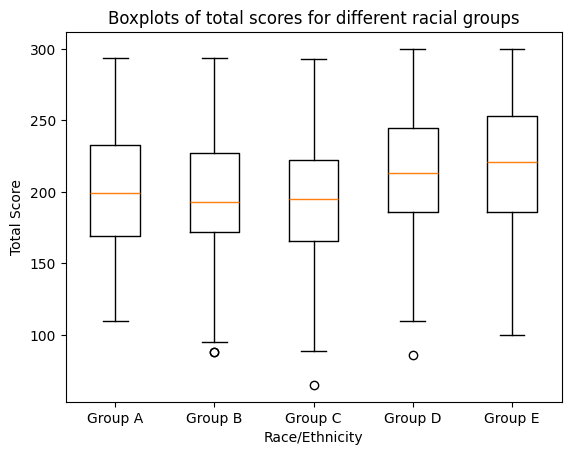

In [231]:
# creating box plots of total scores for different races in the dataset 
fig, ax = plt.subplots()
ax.boxplot([A_df['total_score'], B_df['total_score'], C_df['total_score'], D_df['total_score'],E_df['total_score']], labels=['Group A', 'Group B', 'Group C', 'Group D', 'Group E'])
ax.set_title('Boxplots of total scores for different racial groups')
ax.set_xlabel('Race/Ethnicity')
ax.set_ylabel('Total Score')
plt.show()


In [232]:
# Function to remove outliers based on boxplot
def remove_outliers_boxplot(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify columns to check for outliers
columns_to_check = ['race/ethnicity']

# Remove outliers from specified columns based on boxplot
#df_no_outliers_boxplot = remove_outliers_boxplot(df, columns_to_check)

## Section 4. Knn Algorithm

In [233]:
# Function to convert total_score to letter grade
def score_to_grade(score):
    if score >= 250:
        return 'Excellent'
    elif score >= 170:
        return 'Average'
    else:
        return 'Fail'

In [234]:
# Apply the function to update the total score from number to a letter grade
df['total_score_letter'] = df['total_score'].apply(score_to_grade)

In [235]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Encode the 'Gender' column --> 0 for female, 1 for Male
df['gender'] = label_encoder.fit_transform(df['gender'])
df['race/ethnicity'] = label_encoder.fit_transform(df['race/ethnicity'])
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])
df['lunch'] = label_encoder.fit_transform(df['lunch'])

In [236]:
# Splitting the dataset
attr = df.drop(columns = ['total_score_letter','total_score'])  # features
target = df['total_score_letter']  # target variable

In [237]:
# Splitting dataset into 30% test and 70% training data with random_state as 0
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.3,train_size=0.7, random_state = 0, shuffle = True)

In [238]:
# Training the knn models using k = 3,5,10 values
k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracy = accuracy_score(target_test,target_pred ) 
    cm = confusion_matrix(target_test, target_pred)
    cr = classification_report(target_test, target_pred)
    print(f'Accuracy of model with k = {k}: {accuracy}')
    print('')
    print(f'Classification Report of model with k = {k}:\n {cr}\n')
    
  
    print('--------------------------------------------------------------------------------')


Accuracy of model with k = 3: 0.5966666666666667

Classification Report of model with k = 3:
               precision    recall  f1-score   support

     Average       0.68      0.77      0.72       197
   Excellent       0.27      0.15      0.19        41
        Fail       0.39      0.35      0.37        62

    accuracy                           0.60       300
   macro avg       0.45      0.42      0.43       300
weighted avg       0.57      0.60      0.58       300


--------------------------------------------------------------------------------
Accuracy of model with k = 5: 0.6333333333333333

Classification Report of model with k = 5:
               precision    recall  f1-score   support

     Average       0.69      0.85      0.76       197
   Excellent       0.29      0.15      0.19        41
        Fail       0.47      0.27      0.35        62

    accuracy                           0.63       300
   macro avg       0.48      0.42      0.43       300
weighted avg       0.59

## Section 5. Naive Bayes Model

In [239]:
from sklearn.naive_bayes import CategoricalNB
# Create a Categorical Naive Bayes model
model = CategoricalNB()

# Train the model
model.fit(attr_train, target_train)
# Make predictions on the test set
target_pred = model.predict(attr_test)

In [240]:
# Evaluate the accuracy
accuracy = accuracy_score(target_test, target_pred)
print(f'Accuracy: {accuracy}')
print()
print(confusion_matrix(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Accuracy: 0.6533333333333333

[[181   6  10]
 [ 33   8   0]
 [ 54   1   7]]

Classification Report
              precision    recall  f1-score   support

     Average       0.68      0.92      0.78       197
   Excellent       0.53      0.20      0.29        41
        Fail       0.41      0.11      0.18        62

    accuracy                           0.65       300
   macro avg       0.54      0.41      0.41       300
weighted avg       0.60      0.65      0.59       300



### Section 6. CART Algorithm

In [241]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
# Create the CART model
model = DecisionTreeClassifier()
# Train the model
model.fit(attr_train, target_train)
# Make predictions on the test set
target_pred = model.predict(attr_test)

In [242]:
# Evaluation of the model
accuracy = accuracy_score(target_test, target_pred)
print(f'Accuracy: {accuracy}')
print()
print(confusion_matrix(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))
tree_rules = export_text(model, feature_names=list(attr.columns))
print("CART Tree Rules:\n", tree_rules)

Accuracy: 0.5933333333333334

[[161  15  21]
 [ 34   7   0]
 [ 47   5  10]]

Classification Report
              precision    recall  f1-score   support

     Average       0.67      0.82      0.73       197
   Excellent       0.26      0.17      0.21        41
        Fail       0.32      0.16      0.22        62

    accuracy                           0.59       300
   macro avg       0.42      0.38      0.38       300
weighted avg       0.54      0.59      0.55       300

CART Tree Rules:
 |--- lunch <= 0.50
|   |--- test preparation course <= 0.50
|   |   |--- parental level of education <= 4.50
|   |   |   |--- gender <= 0.50
|   |   |   |   |--- race/ethnicity <= 2.50
|   |   |   |   |   |--- race/ethnicity <= 0.50
|   |   |   |   |   |   |--- class: Average
|   |   |   |   |   |--- race/ethnicity >  0.50
|   |   |   |   |   |   |--- parental level of education <= 0.50
|   |   |   |   |   |   |   |--- race/ethnicity <= 1.50
|   |   |   |   |   |   |   |   |--- class: Average
|   

### Section 7. Random Forest

In [243]:
# creating the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=8)

In [244]:
# Train the model
model.fit(attr_train,target_train)
# Make predictions on the test set
target_pred = model.predict(attr_test)

In [245]:
# Evaluation of the model
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

Accuracy= 0.5966666666666667
[[156  16  25]
 [ 31   9   1]
 [ 42   6  14]]
              precision    recall  f1-score   support

     Average       0.68      0.79      0.73       197
   Excellent       0.29      0.22      0.25        41
        Fail       0.35      0.23      0.27        62

    accuracy                           0.60       300
   macro avg       0.44      0.41      0.42       300
weighted avg       0.56      0.60      0.57       300



In [246]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")
 

Mean Decrease Accuracy[0.09512009 0.30264952 0.37081802 0.13295714 0.09845523]

Mean Decrease GINI= [0.05335771 0.16977156 0.20801075 0.07458245 0.05522856]


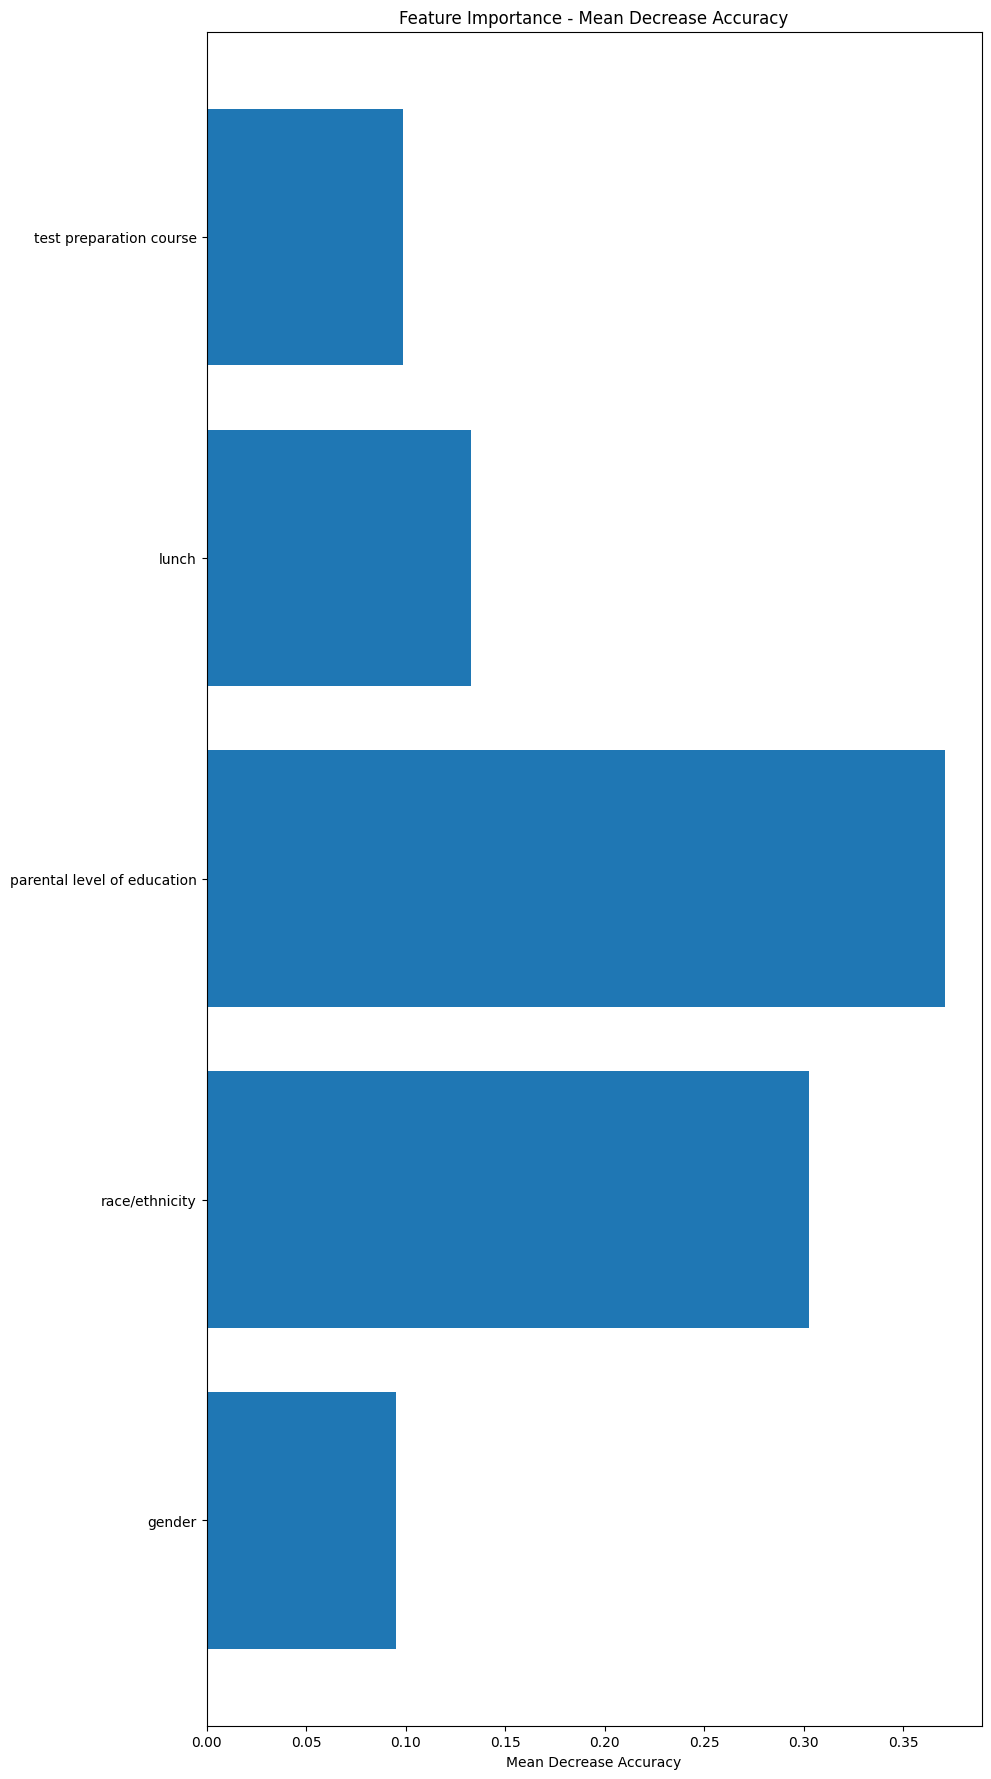

In [247]:
# creating the plot (Mean Decrease Accuracy)
plt.figure(figsize=(10, 22))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()

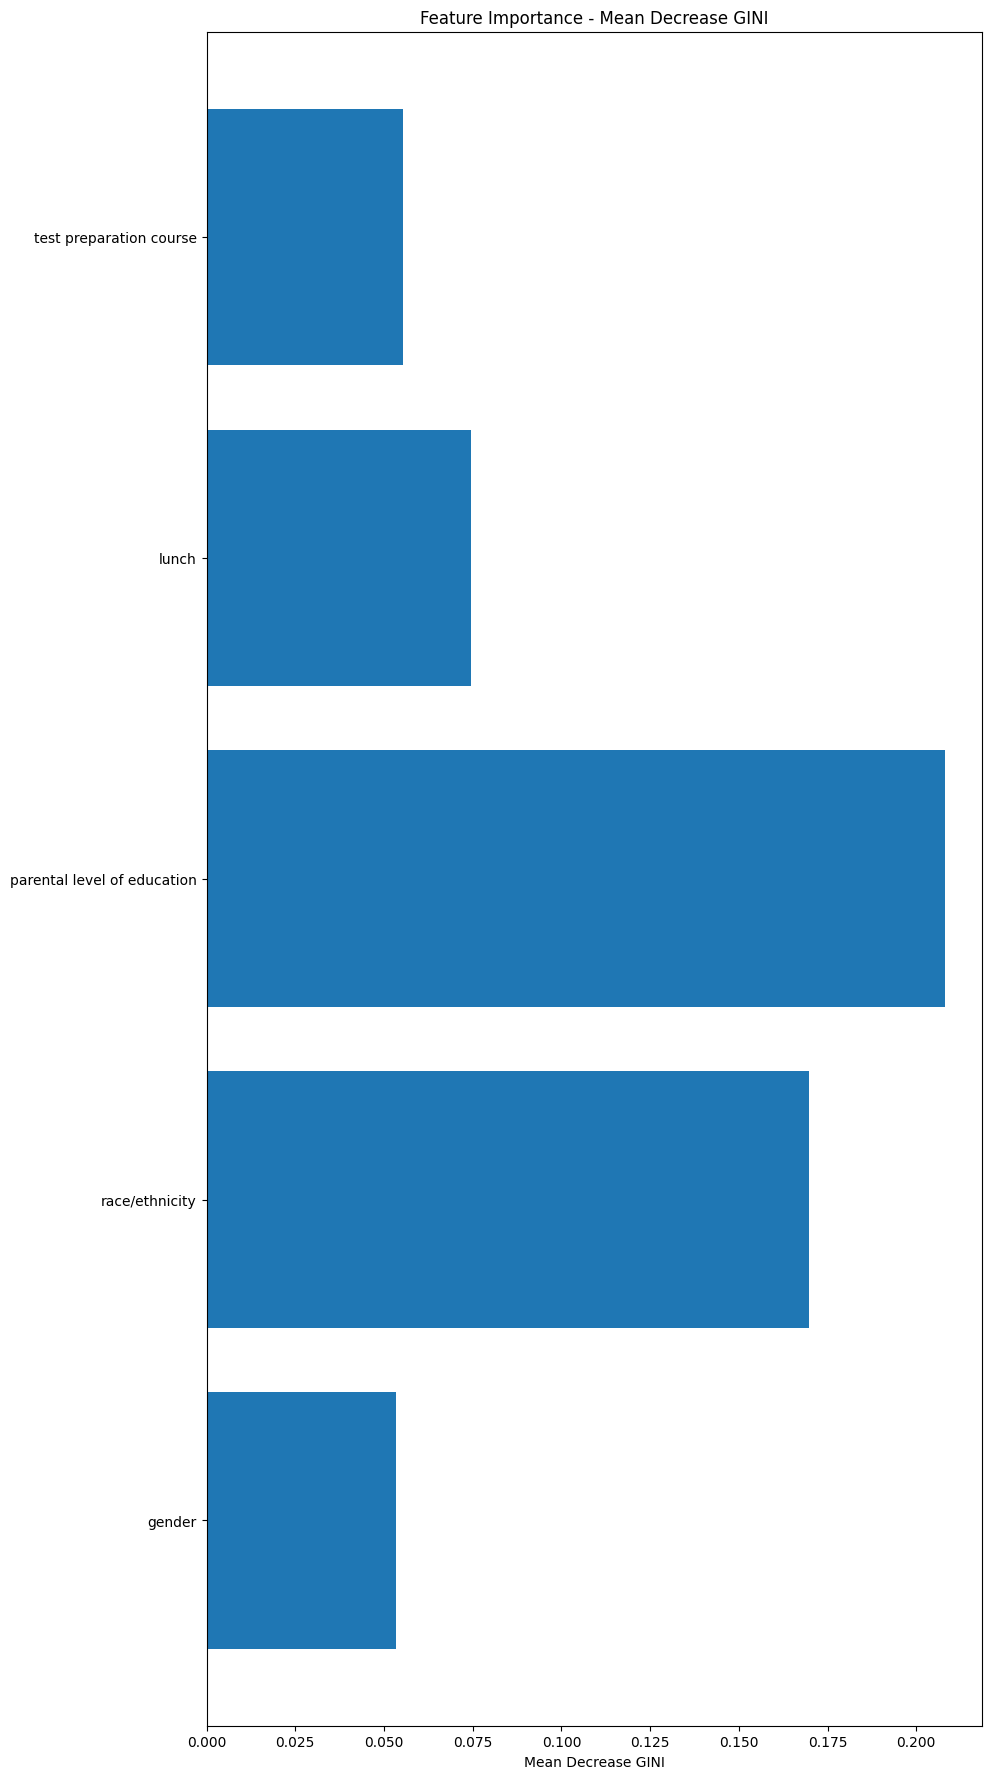

In [248]:
# plot for Mean Decrease GINI
plt.figure(figsize=(10, 22))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [249]:
# displaying the feature scores (top is most important)
feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Show all rows
print(feature_scores)

parental level of education    0.370818
race/ethnicity                 0.302650
lunch                          0.132957
test preparation course        0.098455
gender                         0.095120
dtype: float64


### Section 8. Ridge Regression (Additional technique studied outside of class)

In [250]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [251]:
# Splitting the dataset (using total_score with values instead of letters)
attr = df.drop(columns = ['total_score','total_score_letter'])  # features
target = df['total_score']  # target variable

In [252]:
# Splitting dataset into 30% test and 70% training data with random_state as 0
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.3,train_size=0.7, random_state = 0, shuffle = True)

In [253]:
# Fitting the training data into the model
ridge.fit(attr_train,target_train)

Ridge()

In [254]:
# Making predictions
target_pred=ridge.predict(attr_test)
print(target_pred)

[205.92480473 243.78158786 196.57070187 180.98980238 167.03930818
 192.27699231 219.17311027 188.68547141 204.10483801 224.58459789
 159.50517205 217.05046176 229.06440993 231.18705844 213.45894086
 228.36222127 213.45894086 178.51605954 230.48486978 186.40129001
 158.73848832 182.80976911 208.42311715 201.28000084 197.68847994
 211.63897414 208.04745324 211.63897414 171.33301774 174.57344431
 207.69635891 205.5737104  213.10784653 174.92453864 189.03656574
 235.12967367 188.87503285 186.75238434 192.27699231 228.52721312
 213.10784653 208.42311715 216.69936743 185.1185201  184.74285618
 215.95725328 170.98192341 178.51605954 236.24745173 197.68847994
 205.94937431 201.28000084 199.81112844 186.75238434 231.18705844
 247.72420309 219.71030708 201.28000084 204.29094049 203.75374368
 197.68847994 213.10784653 224.58459789 196.21960754 181.17590486
 215.58158937 222.95073365 228.52721312 199.81112844 219.35921275
 205.5737104  211.63897414 188.68547141 199.81112844 211.99006847
 174.92453

In [255]:
# Evaluating the model
print("Score on Test Data : ",ridge.score(attr_test,target_test))
print("Score on Training Data : ",ridge.score(attr_train,target_train))


Score on Test Data :  0.13814753651744904
Score on Training Data :  0.28249616218692875


### Section 9. Heat Map

In [256]:
# Encode the columns for example: 'Gender' column --> 0 for female, 1 for Male
df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['race/ethnicity'] = label_encoder.fit_transform(df1['race/ethnicity'])
df1['parental level of education'] = label_encoder.fit_transform(df1['parental level of education'])
df1['test preparation course'] = label_encoder.fit_transform(df1['test preparation course'])
df1['lunch'] = label_encoder.fit_transform(df1['lunch'])
# Adding total_score column which combines the math,reading,and writing score
df1['total_score'] = sum([df1['math score'],df1['reading score'],df1['writing score']])

<Axes: >

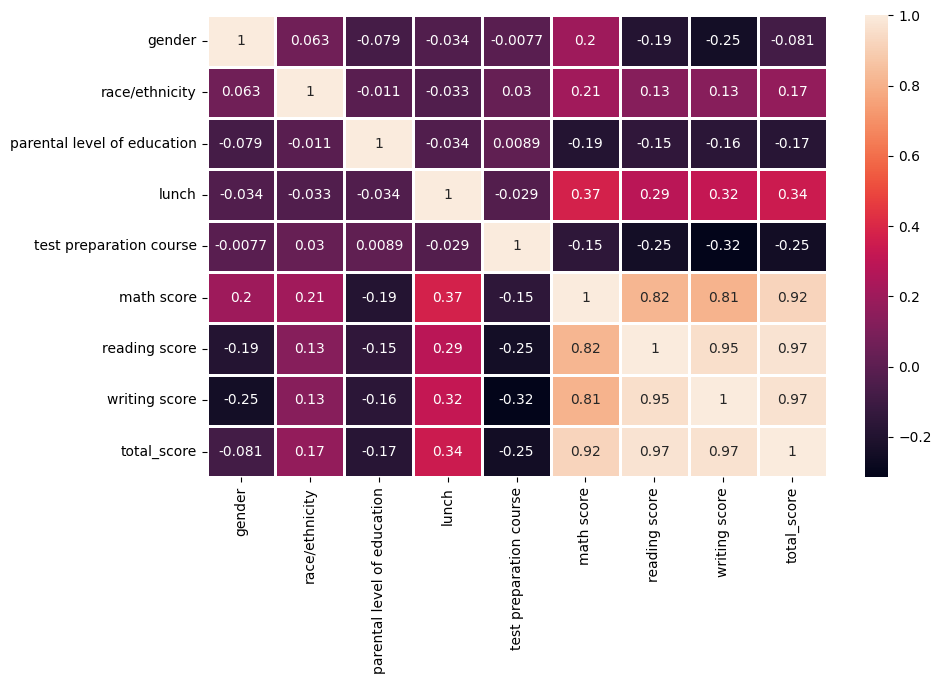

In [257]:
# Creating the heatmap
import seaborn as sns 
correlation = df1.corr()
plt.figure(figsize = (10,6))

sns.heatmap(correlation  , annot = True , linewidth = 1)